# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Supervisionada
## Projeto 2: Construindo um Sistema de Intervenção para Estudantes

Bem-vindo ao segundo projeto do Nanodegree de Machine Learning! Neste Notebook, alguns templates de código já foram fornecidos, e será o seu trabalho implementar funcionalidades necessárias para completar este projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código que se segue precisará de funcionalidades adicionais que você deve fornecer. Instruções serão providenciadas para cada seção e as especificações para cada implementação estarão marcadas no bloco de código com o comando `'TODO'`. Tenha certeza de ler atentamente todas as instruções!

Além do código implementado, haverá questões relacionadas ao projeto e à implementação que você deve responder. Cada seção em que você tem que responder uma questão será antecedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e escreva respostas completas nas caixas de texto subsequentes que começam com **'Resposta: '**. O projeto enviado será avaliado baseado nas respostas para cada questão e a implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas, um clique duplo na célula entra no modo de edição.

### Questão 1 - Classificação versus Regressão
*Seu objetivo neste projeto é identificar estudantes que possam precisar de intervenção antecipada antes de serem reprovados. Que tipo de problema de aprendizagem supervisionada é esse: classificação ou regressão? Por quê?*

**Resposta: ** Esse é um problema de classificação usando aprendizagem supervisionada, pois os alunos estão sendo agrupados em duas categorias: aqueles que possam precisar de intervenção antecipada antes de serem reprovados e aqueles que podem não precisar. 

Adicionalmente, é um caso de machine learning onde os falsos positivos não são tão graves quanto aos falsos negativos, ou seja, identificar um aluno que não precisa de intervenção antecipada, mas mesmo assim oferecer recursos de suporte ao aprendizado não é tão grave quanto deixá-los de oferecer para um que precisava e não foi identificado pelo modelo. Essa premissa poderá ser importante para medir a precisão do modelo final a ser obtido.

Exemplificando na *confusion matrix* abaixo, o que preferimos então é um alto recall (minimizar falsos negativos), mesmo que impacte um pouco na precisão (minimizar falsos positivos). No entanto, usar um F score de 1 já é uma boa, mas em trabalhos futuros poderiam-se utilizar F scores maiores (para considerar mais o *Recall* no score). Uma outra alternativa em vez de aumentar o valor de beta seria mudar a classe positiva para os alunos que não passaram (mudar pos_label para `'no'`) o que também acho que faria mais sentido.

<img src="confusion_matrix.png" width="50%"/>

>Machine learning's next trick is generating videos from photos ,URL: https://www.theverge.com/2016/9/12/12886698/machine-learning-video-image-prediction-mit

## Observando os Dados
Execute a célula de código abaixo para carregar as bibliotecas de Python necessárias e os dados sobre os estudantes. Note que a última coluna desse conjunto de dados, `'passed'`, será nosso rótulo alvo (se o aluno foi ou não aprovado). As outras colunas são atributos sobre cada aluno.

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Ler os dados dos estudantes
student_data = pd.read_csv("student-data.csv")
# Obtendo algumas informações sobre o Dataset
print(student_data.head())
print(student_data.info())
print(student_data.describe())

print("Os dados dos estudantes foram lidos com êxito!")

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   ...   internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0  ...         no       no       4         3      4    1    1      3        6   
1  ...        yes       no       5         3      3    1    1      3        4   
2  ...        yes       no       4         3      2    2    3      3       10   
3  ...        yes      yes       3         2      2    1    1      5        2   
4  ...         no       no       4         3      2    1    2      5        4   

  passed  
0     no  
1     no  
2    yes  
3    yes  
4

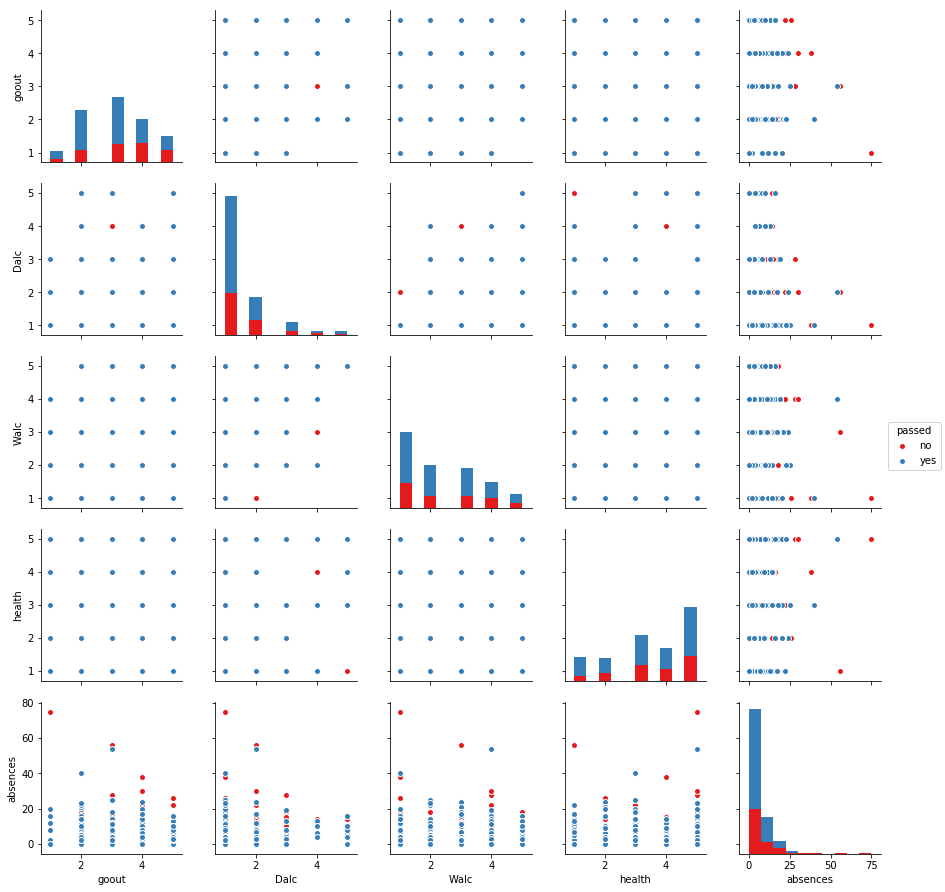

In [2]:
# Avaliando uma correlação entre os últimos 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(student_data.iloc[:,25:], 
             palette = 'Set1', 
             hue = 'passed')
plt.show()

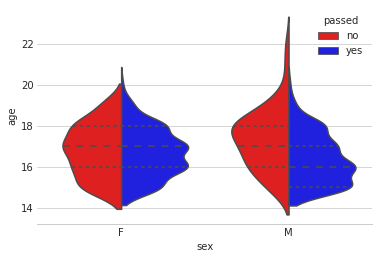

In [24]:
# Analisando a relação entre idade de quem passou e de quem não passou, por sexo.
with sns.axes_style("whitegrid"):
    # Draw a nested violinplot and split the violins for easier comparison
    sns.violinplot(x="sex", 
                   y="age", 
                   hue="passed", 
                   data=student_data, 
                   split=True, 
                   inner="quart", 
                   palette={"yes": "b", "no": "r"})
    sns.despine(left=True)

### Implementação: Observando os Dados
Vamos começar observando o conjunto de dados para determinar quantos são os estudantes sobre os quais temos informações e entender a taxa de graduação entre esses estudantes. Na célula de código abaixo, você vai precisar calcular o seguinte:
- O número total de estudantes, `n_students`.
- O número total de atributos para cada estudante, `n_features`.
- O número de estudantes aprovados, `n_passed`.
- O número de estudantes reprovados, `n_failed`.
- A taxa de graduação da classe, `grad_rate`, em porcentagem (%).


In [3]:
# TODO: Calcule o número de estudante
n_students = student_data.shape[0]

# TODO: Calcule o número de atributos
n_features = student_data.shape[1] - 1 # desconsiderando a coluna de índice

# TODO: Calcule o número de alunos aprovados
n_passed = student_data[student_data['passed']=='yes'].shape[0]

# TODO: Calcule o número de alunos reprovados
n_failed = student_data[student_data['passed']=='no'].shape[0]

# TODO: Calcule a taxa de graduação
grad_rate = 100.*n_passed/n_students

# Imprima os resultados
print("Número total de estudantes: {}".format(n_students))
print("Número de atributos: {}".format(n_features))
print("Número de estudantes aprovados: {}".format(n_passed))
print("Número de estudantes reprovados: {}".format(n_failed))
print("Taxa de graduação: {:.2f}%".format(grad_rate))

Número total de estudantes: 395
Número de atributos: 30
Número de estudantes aprovados: 265
Número de estudantes reprovados: 130
Taxa de graduação: 67.09%


### Observação: Dataset desbalanceado, importante fazer amostragem estratificada
Como pode-se observar, esta base de dados é um pouco desbalanceada: 67% dos estudantes passaram e 33% reprovaram. Idealmente, esta proporção deve ser preservada para os novos subconjuntos de treino e teste. Durante o processo de divisão treino/teste cada valor de `'random_state'` acaba criando uma proporção diferente. Para que esta proporção seja preservada, devemos fazer uma amostragem estratificada. Em `'train_test_split'`, isto pode ser feito inserindo-se o parâmetro `'stratify=y_all'`. Desta forma, a apresentação de resultados será mais consistente com a realidade e teremos maior confiança sobre a influência de parâmetros no modelo final. A amostragem continua sendo aleatória, no entanto com a proporção de classes preservada.

## Preparando os Dados
Nesta seção, vamos preparara os dados para modelagem, treinamento e teste.

### Identificar atributos e variáveis-alvo
É comum que os dados que você obteve contenham atributos não numéricos. Isso pode ser um problema, dado que a maioria dos algoritmos de machine learning esperam dados númericos para operar cálculos.

Execute a célula de código abaixo para separar os dados dos estudantes em atributos e variáveis-alvo e verificar se algum desses atributos é não numérico.

In [4]:
# FORFUN: Como a ideia é mapear os que não vão passar, e o dataset está desbalanceado, aqui um exemplo de inversão.
# No entanto parece que, para esse problema, é melhor prever quem vai passar do quem não vai passar, ou seja
#para 'yes' para 'passed' ou resultados ficarem melhores que 'no' para 'not_passed' (inversão do rótulo)
#print(student_data['passed'].head())

#student_data = student_data.rename(columns={'passed': 'not_passed'})
#
#student_data['not_passed'] = student_data['not_passed'].replace({'yes': 0, 'no': 1})
#student_data['not_passed'] = student_data['not_passed'].replace({1: 'yes', 0: 'no'})
#
#print(student_data['not_passed'].head())

In [5]:
# Extraia as colunas dos atributo
feature_cols = list(student_data.columns[:-1]) # n-1 atributos

# Extraia a coluna-alvo 'passed'
target_col = student_data.columns[-1] # 1 label

# Mostre a lista de colunas
print("Colunas de atributos:\n{}".format(feature_cols))
print("\nColuna-alvo: {}".format(target_col))

# Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Mostre os atributos imprimindo as cinco primeiras linhas
print("\nFeature values:")
print(X_all.head())
print(y_all.head())

Colunas de atributos:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Coluna-alvo: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Pré-processar Colunas de Atributo

Como você pode ver, há muitas colunas não numéricas que precisam ser convertidas! Muitas delas são simplesmente `yes`/`no`, por exemplo, a coluna `internet`. É razoável converter essas variáveis em valores (binários) `1`/`0`.

Outras colunas, como `Mjob` e `Fjob`, têm mais do que dois valores e são conhecidas como variáveis categóricas. A maneira recomendada de lidar com esse tipo de coluna é criar uma quantidade de colunas proporcional aos possíveis valores (por exemplo, `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc), e assinalar `1` para um deles e `0` para todos os outros.

Essas colunas geradas são por vezes chamadas de _variáveis postiças_ (_dummy variables_), e nós iremos utilizar a função [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para fazer essa conversão. Execute a célula de código abaixo para executar a rotina de pré-processamento discutida nesta seção.

>Binary encoding, URL: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

>Beyond One-Hot: an exploration of categorical variables, URL: https://www.kdnuggets.com/2015/12/beyond-one-hot-exploration-categorical-variables.html

In [6]:
def preprocess_features(X):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():
        
        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            # drop_first=True gera menos colunas sem perder informação
            col_data = pd.get_dummies(col_data, 
                                      prefix = col, 
                                      drop_first=True)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (39 total features):
['school_MS', 'sex_M', 'age', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [7]:
''' Como pode ser observado, com o uso da função do Pandas get_dummies(), para cada dado categórico foi criada
uma coluna, e atribuído o valor 0/1 dependendo de cada dado. Por exemplo, para cada dado categórico de Fjob foi
criada uma coluna : Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher' e atribuído o 
valor 0/1'''
X_all.head()

,school_MS,sex_M,age,address_U,famsize_LE3,Pstatus_T,Medu,Fedu,Mjob_health,Mjob_other,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,0,0,...,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,0,0,...,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,1,0,...,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,0,1,...,1,0,0,4,3,2,1,2,5,4


### Implementação: Divisão dos Dados de Treinamento e Teste
Até agora, nós convertemos todos os atributos _categóricos_ em valores numéricos. Para o próximo passo, vamos dividir os dados (tanto atributos como os rótulos correspondentes) em conjuntos de treinamento e teste. Na célula de código abaixo, você irá precisar implementar o seguinte:
- Embaralhe aleatoriamente os dados (`X_all`, `y_all`) em subconjuntos de treinamento e teste.
  - Utilizar 300 pontos de treinamento (aproxidamente 75%) e 95 pontos de teste (aproximadamente 25%).
  - Estabelecer um `random_state` para as funções que você utiliza, se a opção existir.
  - Armazene os resultados em `X_train`, `X_test`, `y_train` e `y_test`.

In [9]:
# TODO: Importe qualquer funcionalidade adicional de que você possa precisar aqui
from sklearn.cross_validation import train_test_split

''' Aqui é importante observar essa divisão dos dados de treinamento e de teste(validação), uma boa regra de se 
aplicar para dividir os dados, conforme enunciado, é a Regra de Pareto 80/20.'''
# TODO: Estabeleça o número de pontos de treinamento
num_train = 300

# Estabeleça o número de pontos de teste
num_test = X_all.shape[0] - num_train

# TODO: Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo
# stratify=y_all para realizar uma amostragem estratificada, pois o Dataset está desbalanceado
X_train, X_test, y_train, y_test = train_test_split(X_all, 
                                                    y_all, 
                                                    train_size=num_train, 
                                                    stratify=y_all, 
                                                    random_state=50)

# Mostre o resultado da distribuição
print("O conjunto de treinamento tem {} amostras.".format(X_train.shape[0]))
print("O conjunto de teste tem {} amostras.".format(X_test.shape[0]))

O conjunto de treinamento tem 300 amostras.
O conjunto de teste tem 95 amostras.


## Treinando e Avaliando Modelos
Nesta seção, você irá escolher 3 modelos de aprendizagem supervisionada que sejam apropriados para esse problema e que estejam disponíveis no `scikit-learn`. Primeiro você irá discutir o raciocínio por trás da escolha desses três modelos considerando suas vantagens e desvantagens e o que você sabe sobre os dados. Depois você irá ajustar o modelo a diferentes tamanhos de conjuntos de treinamento (com 100, 200 e 300 pontos) e medir a pontuação F<sub>1</sub>. Você vai precisar preencher três tabelas (uma para cada modelo) que mostrem o tamanho do conjunto de treinamento, o tempo de treinamento, o tempo de previsão e a pontuação F<sub>1</sub> no conjunto de treinamento.

**Os seguintes modelos de aprendizagem supervisionada estão atualmente disponíveis no **[`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)** para você escolher:**
- Gaussian Naive Bayes (GaussianNB)
- Árvores de Decisão
- Métodos de agregação (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Método do gradiente estocástico (SGDC)
- Máquinas de vetores de suporte (SVM)
- Regressão logística

### Questão 2 - Aplicação dos Modelos
*Liste três modelos de aprendizagem supervisionada que são apropriadas para esse problema. Para cada modelo escolhido:*
- Descreva uma aplicação em mundo real na indústria em que o modelo pode ser aplicado. *(Talvez você precise fazer um pouco de pesquisa para responder essa questão – dê as devidas referências!)* 
- Quais são as vantagens do modelo; quando ele tem desempenho melhor? 
- Quais são as desvantagens do modelo, quando ele tem desempenho pior?
- O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?

<img src="ml_map.png"/>

**Resposta: **Para lidar com o problema de **classificação**, os seguintes modelos são apropriados:Regressão Logística, Naive Bayes e SVM.

### **Regressão Logística**
- **Aplicação: **É um dos modelos mais simples de classificação, e funciona muito bem quando os dados são *linearmente separáveis*. Uma aplicação desse modelo é na classificação de alunos a serem aceitos ou não em uma universidade baseados em suas notas, por exemplo. Também pode ser usado em diversas aplicações médicas de diagnóstico e curiosamente prever medidas de segurança para minas de carvão.
- **Vantagens: **
    - As saídas têm uma boa interpretação probabilística e o algoritmo pode ser ajustado para evitar o overfitting; 
    - Os modelos logísticos podem ser atualizados facilmente com novos dados usando Método do gradiente estocástico (SGDC); 
    - Simples, funciona muito bem quando os dados são linearmente separáveis.
    
    
- **Desvantagens: **
    - O conjunto de dados do problema precisa ser linearmente separável; 
    - A regressão logística tende a ter uma performance inferior quando existem limites de decisão múltiplos ou não-lineares; 
    - Eles não são flexíveis o suficiente para capturar naturalmente relacionamentos mais complexos.
    
    
- **O que faz ele um bom candidado para o problema, baseado nos dados: **A aplicação desse modelo para o problema é bastante promissora pois a Regressão Logística se aplica para problemas como o desse projeto (que inclusive se parece com o exemplificado), embora não dê para saber se os dados são linearmente separáveis. Isso somente será possível de avaliar durante os testes a seguir. Além disso, inspirando-se no princípio da *Navalha de Occam*, é bom começar com poucas premissas e com um modelo bem básico como referência para depois avaliar modelos mais complexos.

<img src="logistic.png" width="35%"/>

### **Gaussian Naive Bayes (GaussianNB)**
- **Aplicação: **É um algoritmo muito simples em torno de probabilidade condicional e contagem. Basicamente é uma tabela de probabilidade, que se assemelha estruturalmente a uma Árvode de Decisão, atualizada com o treinamento. o Naive (que significa `"ingênuo"`) pois considera *independência dos dados* (dos atributos) o que raramente ocorre no mundo real. Esse modelo é bastante eficiente e utilizado em classificação de documentos (especialmente em classificação de SPAM, como é usado pelo Google no GMail), classificação de textos (como notícias que o usuário possa gostar em seu feed e *trend topics*), a sugestão de autocompletar em textos, como teclados de celular e *sentimental analysis* (de Tweets, por exemplo, identificando expressões negativas e positivas em textos). Assim como a Regressão Logística, tem sucesso em algumas aplicações médicas (prever doenças) e biológicas.
- **Vantagens: **
    - Funciona bem para Datasets com muitos atributos e quando os dados são categóricos;
    - É um algoritmo muito rápido para treinamento;
    - Como precisa de poucos parâmetros, é menos suscetível à overfitting;
    - Separa bem o ruído nos dados.
    
    
- **Desvantagens: **
    - Ele precisa de um Dataset moderado para treinamento;
    - Os atributos precisam ser independentes entre si;
    
    
- **O que faz ele um bom candidado para o problema, baseado nos dados: **Como o Dataset possui muitos atributos, e um número bom de dados (quase 400), parece ser interessante usar o Naive Bayes, até porque para verificar se é um bom modelo exigirá pouco esforço computacional. No entanto, não é possível saber se todas os atributos são independentes entre si, o que poderá ser verificado apenas com o resultado final da modelagem, comparando-se o score com os demais modelos.

### **Máquinas de Vetores de Suporte (SVM)**
- **Aplicação: **Esse modelo utiliza kernels, que aprendem a diferenciar duas categorias de dados com base em similaridades de exemplos passados, determinando uma borda de decisão que maximiza a distancia entre os membros mais próximos das categorias. Os exemplos de uso são parecidos com os da Regressão Logística, mas agora sem a restrição dos dados serem linearmente separáveis. São usados portanto em reconhecimento de escrita (mais do que Redes Neurais), reconhecimento facial, e classificação de imagens. Além disso, pode ser usado para prever dinâmicas de mercados e previsões financeiras.  
- **Vantagens: **
    - Consegue lidar com dados não-lineares;
    - Não é necessário tomar premissas sobre o relacionamento entre os dados (como Regressão Logística e Naive Bayes o fazem);
    - Geralmente resulta em modelos com melhor classificação de valores futuros;
    - Possui diversos kernels;
    - Bastante robusto contra overfitting, especialmente em espaços multi-dimensionais;
    
    
- **Desvantagens: **
    - Computacionalmente, exige bastante memória;
    - Exige uma certa habilidade em escolher o melhor kernel para modelar a solução do probblema;
    - Não escala muito bem bara grandes bases de dados;
    - É mais utilizado como um classificador binário (que é como ele funciona melhor). Não funciona bem para problemas multi-classe;
    - Atualmente, na indústria, tem-se preferido utilizar Random Forest ao invés de SVM.
    
    
- **O que faz ele um bom candidado para o problema, baseado nos dados: **Como o nosso problema é binário ("passou" ou "não passou"), o Dataset é de volume moderado, e não temos certeza se a Regressão Linear funcionará (ou seja, é uma alternativa boa se os dados não forem linearmente separáveis), o uso do SVM é interessante para esse problema. No entanto, escolher o melhor kernel deverá ser um ponto de atenção.

<img src="svm.png" width="35%"/>

No entanto, segue uma análise dos demais métodos.

### **Árvores de Decisão (e suas variações: Gradient/Decision boosting, Random/Decision Forest )**
- **Aplicação: **Também conhecidas como *Árvores de Classificação*, é um modelo bastante intuitivo graficamente ou programáticamente (através de *if-then statements*). Funciona muito bem quando os dados podem ser bem divididos a cada camada de decisão. Uma aplicação desse modelo é em que partido um eleitor vai votar, baseada em suas características como idade, sexo, classe social, etc. Ou, da mesma forma, é um excelente classificador para prever se um usuário vai assinar ou não um plano pago (*user signup*) de algum serviço ou até mesmo o funil/pipeline que o leva a tomar essa ação. Também pode ser utilizado para ranking, como no Netflix. Tem sido utilizado também com sucesso em problemas de reconhecimento de voz através de otimização e pruning de árvores. Tem aplicações também em sensoriamento remoto.
- **Vantagens: **
    - Devido à sua estrutura natural, escala bem e lida muito bem com dados não-lineares;
    - Rápido de treinar e de visualizar o resultado e robusta a erros;
    - Lida bem com dados categóricos e numéricos;
    - Não é necessário tomar premissas sobre o relacionamento entre os dados (como Regressão Logística e Naive Bayes o fazem).
    
- **Desvantagens: **
    - Podem crescer muito rápido de estrutura com Datasets grandes, causando overfitting (o que pode ser aliviado pelos métodos de *ensemble*);
    - Geralmente resulta em modelos menos generalizados;
    - Também usa bastante memória;
    
    
- **O que faz ele um bom candidado para o problema, baseado nos dados: **Esse modelo, também simples, consegue lidar com dados que não são linearmente separáveis e categóricos. Além disso, existem muitos atributos cujos valores podem ser interpretados como "0/1" ou "não/sim", o que é perfeito para esse método. No entanto, ainda é uma dúvida se pelo tamanho do Dataset poderá resultar em um overfit ou ser serão necessárias técnicas de *ensemble* para contornar esse possível problema. 

<img src="tree.png" width="35%"/>

### **Deep Learning (Redes Neurais)**
- **Aplicação: **Inspirado no funcionamento do cérebro humano, esse clasificador de muitas maneiras faz a ponte entre o aprendizado de máquina e a ciência cognitiva, sendo bastante conveniente para classificação. Como principal aplicação do Deep Learning (utilizando MLP - *Multi Layer Perceptron* conectados por `"sinapses"`) temos o reconhecimento de imagens e de audio, principalmente com o aumento da capacidade de processamento de dados atual, bem como reconhecimento de movimento (andar, percurso de carros autônomos, voos de autônomos), também aplicações médicas, e até tradução de textos (Google Translator).
- **Vantagens: **
    - Possui muitos parâmetros se comparados aos outros métodos, o que lhe confere bastante versatilidade;
    - Possui alta escalabilidade;
    - Eficiente no uso de memória.
    
    
- **Desvantagens: **
    - Pode tomar muito tempo e recursos computacionais para treinamento (para evitar *extremos locais* e outras situações típicas desse modelo);
    - Precisa de bastante dados para treinamento;
    - É uma caixa preta, ou seja, difícil de visualizar a estrutura final de uma rede neural;
    - Alto nível de complexidade na modelagem.
    
    
- **O que faz ele um bom candidado para o problema, baseado nos dados: **Para esse problema, acho que iríamos cair em uma situação de `"Matar uma mosca com uma bazooka"`. Apesar de ser interessante usar uma Rede Neural para resolver esse problema, acredito que ele possa ser resolvido com métodos mais simples.

<img src="nn.png" width="35%"/>

### **K-Nearest Neighbors (K-NN)**
- **Aplicação: **É uma classe de algoritmos especializados, denominada de *instance-based*, quando o problema exige uma objetivo bastante específico  ou uma *clusterização* do conjunto de dados, e utiliza funções que calculam similaridade dos dados com base em uma medida de *distância* entre eles. Geralmente é utilizada em aprendizagem não supervisionada, mas no campo da aprendizagem supervisionada uma aplicação bastante interessante para o K-NN é a detecção de anomalias nos dados (ou no modelo de agrupamento deles), como por exemplo detecção de fraudes e outras vulnerabilidades de segurança.
- **Vantagens: **
    - Consegue lidar com funções numericamente complexas;
    - Útil quando o dado é difícil/caro de se obter, pois ao longo do processo de escala do modelo, pode-se revelar que dados são úteis ou não de se coletar.
    
    
- **Desvantagens: **
    - Usam intensivamente a memória (muitas vezes até Bancos de Dados - *instance-based*);
    - Requer todos os dados treinamento para realizar a previsão;
    - Encontrar as funções de distância pode ser computacionalmente intensivo.
    

- **O que faz ele um bom candidado para o problema, baseado nos dados: **No problema em questão até poderia ser utilizado para clusterizar o Dataset e encontrar a função de distância que classificaria se um aluno precisa ou não dos recursos dado o grupo que se encaixa. No entanto, acredito que seja também uma situação de `"Matar uma mosca com uma bazooka"`.

<img src="knn.png" width="35%"/>

>Modern Machine Learning Algorithms: Strengths and Weaknesses, URL: https://elitedatascience.com/machine-learning-algorithms#classification

>Machine Learning Algorithms for Business Applications – Complete Guide, URL: https://www.techemergence.com/machine-learning-algorithms-for-business-applications-complete-guide/

>How to choose algorithms for Microsoft Azure Machine Learning, URL: https://docs.microsoft.com/en-us/azure/machine-learning/studio/algorithm-choice

>Complete Guide to Parameter Tuning in XGBoost (with codes in Python), URL: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

>Xgboost, URL: https://en.wikipedia.org/wiki/Xgboost

>Machine Learning, do Vale do Silício ao Brasil, URL: https://www.youtube.com/watch?v=AJdoVmhAxUk&feature=youtu.be&t=1h37m28s

>Installing XGBoost on Mac OSX, URL: https://www.ibm.com/developerworks/community/blogs/jfp/entry/Installing_XGBoost_on_Mac_OSX?lang=en

>XGBoost Installation Guide, URL: http://xgboost.readthedocs.io/en/latest/build.html#python-package-installation

>How to Develop Your First XGBoost Model in Python with scikit-learn, URL: https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

### Configuração
Execute a célula de código abaixo para inicializar três funções de ajuda que você pode utilizar para treinar e testar os três modelos de aprendizagem supervisionada que você escolheu acima. As funções são as seguintes:
- `train_classifier` - recebe como parâmetro um classificador e dados de treinamento e ajusta o classificador aos dados.
- `predict_labels` - recebe como parâmetro um classificador ajustado, atributos e rótulo alvo e faz estimativas utilizando a pontuação do F<sub>1</sub>.
- `train_predict` - recebe como entrada um classificador, e dados de treinamento e teste, e executa `train_clasifier` e `predict_labels`.
 - Essa função vai dar a pontuação F<sub>1</sub> tanto para os dados de treinamento como para os de teste, separadamente.

In [10]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print("O modelo foi treinado em {:.4f} segundos".format(end - start))
    return (end - start)

    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print("As previsões foram feitas em {:.4f} segundos.".format(end - start))
    return (end - start), f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print("Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Treina o classificador
    train_time = train_classifier(clf, X_train, y_train)
    time, f1_score_train = predict_labels(clf, X_train, y_train)
    test_time, f1_score_test = predict_labels(clf, X_test, y_test)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print("Pontuação F1 para o conjunto de treino: {:.4f}.".format(f1_score_train))
    print("Pontuação F1 para o conjunto de teste: {:.4f}.".format(f1_score_test))
    
    return[clf.__class__.__name__, len(X_train), train_time, test_time, f1_score_train, f1_score_test]

### Implementação: Métricas de Desempenho do Modelo
Com as funções acima, você vai importar os três modelos de aprendizagem supervisionada de sua escolha e executar a função `train_prediction` para cada um deles. Lembre-se de que você vai precisar treinar e usar cada classificador para três diferentes tamanhos de conjuntos de treinamentos: 100, 200 e 300 pontos. Então você deve ter 9 saídas diferentes abaixo – 3 para cada modelo utilizando cada tamanho de conjunto de treinamento. Na célula de código a seguir, você deve implementar o seguinte:
- Importe os três modelos de aprendizagem supervisionada que você escolheu na seção anterior.
- Inicialize os três modelos e armazene eles em `clf_A`, `clf_B` e `clf_C`.
 - Defina um `random_state` para cada modelo, se a opção existir.
 - **Nota:** Utilize as configurações padrão para cada modelo – você vai calibrar um modelo específico em uma seção posterior.
- Crie diferentes tamanhos de conjuntos de treinamento para treinar cada modelo.
 - *Não embaralhe e distribua novamente os dados! Os novos pontos de treinamento devem ser tirados de `X_train` e `y_train`.*
- Treine cada modelo com cada tamanho de conjunto de treinamento e faça estimativas com o conjunto de teste (9 vezes no total).  
**Nota:** Três tabelas são fornecidas depois da célula de código a seguir, nas quais você deve anotar seus resultados.

In [11]:
# TODO: Importe os três modelos de aprendizagem supervisionada do sklearn
# from sklearn import model_A
# from sklearn import model_B
# from skearln import model_C
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# FORFUN: Teste de demais classificadores
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost.sklearn import XGBClassifier
# Apresenta problema no classificador padrão para o Dataset com 200 dados de treino
# from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.linear_model import LogisticRegression

# TODO: Inicialize os três modelos
clf_A = LogisticRegression()
clf_B = GaussianNB()
clf_C = SVC()

# FORFUN: Inicialização dos demais modelos
clf_D = LinearSVC()
clf_E = MLPClassifier()
clf_F = KNeighborsClassifier()
clf_G = DecisionTreeClassifier()
clf_H = GradientBoostingClassifier()
clf_I = BaggingClassifier()
clf_J = RandomForestClassifier()
clf_K = AdaBoostClassifier()
clf_L = VotingClassifier(estimators=[('lr', LogisticRegression())])
clf_M = SGDClassifier()
clf_N = XGBClassifier()

df = pd.DataFrame(columns=['Classifier', 'Tamanho do Conjunto de Treinamento','Tempo de Treinamento','Tempo de Estimativa (teste)','Pontuação F1 (treinamento)','Pontuação F1 (teste)'])

# TODO: Configure os tamanho dos conjuntos de treinamento
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# TODO: Executar a função 'train_predict' para cada classificador e cada tamanho de conjunto de treinamento
# train_predict(clf, X_train, y_train, X_test, y_test)
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F, clf_G, clf_H, clf_I, clf_J, clf_K, clf_L, clf_M, clf_N]:
    print("\n{}: \n".format(clf.__class__.__name__))
    for n in [100, 200, 300]:
        register = train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)
        
        # Monta a tabela
        data = pd.DataFrame([register], columns=df.keys())
        df = df.append(data)

/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)



LogisticRegression: 

Treinando um LogisticRegression com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0063 segundos
As previsões foram feitas em 0.0007 segundos.
As previsões foram feitas em 0.0006 segundos.
Pontuação F1 para o conjunto de treino: 0.9143.
Pontuação F1 para o conjunto de teste: 0.8060.
Treinando um LogisticRegression com 200 pontos de treinamento. . .
O modelo foi treinado em 0.0028 segundos
As previsões foram feitas em 0.0005 segundos.
As previsões foram feitas em 0.0004 segundos.
Pontuação F1 para o conjunto de treino: 0.8459.
Pontuação F1 para o conjunto de teste: 0.8201.
Treinando um LogisticRegression com 300 pontos de treinamento. . .
O modelo foi treinado em 0.0035 segundos
As previsões foram feitas em 0.0005 segundos.
As previsões foram feitas em 0.0005 segundos.
Pontuação F1 para o conjunto de treino: 0.8433.
Pontuação F1 para o conjunto de teste: 0.7714.

GaussianNB: 

Treinando um GaussianNB com 100 pontos de treinamento. . .
O modelo foi trein

/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


As previsões foram feitas em 0.0004 segundos.
Pontuação F1 para o conjunto de treino: 0.8356.
Pontuação F1 para o conjunto de teste: 0.7778.

MLPClassifier: 

Treinando um MLPClassifier com 100 pontos de treinamento. . .
O modelo foi treinado em 0.2201 segundos
As previsões foram feitas em 0.0015 segundos.
As previsões foram feitas em 0.0007 segundos.
Pontuação F1 para o conjunto de treino: 1.0000.
Pontuação F1 para o conjunto de teste: 0.7576.
Treinando um MLPClassifier com 200 pontos de treinamento. . .
O modelo foi treinado em 0.0282 segundos
As previsões foram feitas em 0.0010 segundos.
As previsões foram feitas em 0.0004 segundos.
Pontuação F1 para o conjunto de treino: 0.7491.
Pontuação F1 para o conjunto de teste: 0.8000.
Treinando um MLPClassifier com 300 pontos de treinamento. . .
O modelo foi treinado em 0.0143 segundos
As previsões foram feitas em 0.0013 segundos.
As previsões foram feitas em 0.0005 segundos.
Pontuação F1 para o conjunto de treino: 0.8016.
Pontuação F1 para 

In [12]:
# Vizualizando o Benchmark final
df

,Classifier,Tamanho do Conjunto de Treinamento,Tempo de Treinamento,Tempo de Estimativa (teste),Pontuação F1 (treinamento),Pontuação F1 (teste)
0,LogisticRegression,100,0.006324,0.000598,0.914286,0.805970
0,LogisticRegression,200,0.002769,0.000402,0.845878,0.820144
0,LogisticRegression,300,0.003540,0.000525,0.843318,0.771429
0,GaussianNB,100,0.001305,0.000486,0.814815,0.740157
0,GaussianNB,200,0.001722,0.000425,0.812950,0.800000
0,GaussianNB,300,0.002486,0.000374,0.791367,0.785185
0,SVC,100,0.003475,0.001273,0.893333,0.818182
0,SVC,200,0.004436,0.001361,0.870432,0.824324
0,SVC,300,0.007929,0.001900,0.877193,0.802632
0,LinearSVC,100,0.007847,0.000290,0.919708,0.759690


In [13]:
# Média F1 Score para treinamento
ranking = df.groupby(['Classifier'])['Pontuação F1 (treinamento)'].mean()
ranking.sort_values(axis=0)

Classifier
SGDClassifier                 0.791791
GaussianNB                    0.806377
MLPClassifier                 0.850240
KNeighborsClassifier          0.850874
LinearSVC                     0.867310
LogisticRegression            0.867827
VotingClassifier              0.867827
SVC                           0.880319
AdaBoostClassifier            0.901303
XGBClassifier                 0.972057
GradientBoostingClassifier    0.987361
RandomForestClassifier        0.993329
BaggingClassifier             0.996662
DecisionTreeClassifier        1.000000
Name: Pontuação F1 (treinamento), dtype: float64

In [14]:
# Média F1 Score para teste (validação)
ranking = df.groupby(['Classifier'])['Pontuação F1 (teste)'].mean()
ranking.sort_values(axis=0)

Classifier
RandomForestClassifier        0.713305
DecisionTreeClassifier        0.715335
BaggingClassifier             0.752317
AdaBoostClassifier            0.753817
KNeighborsClassifier          0.766684
GaussianNB                    0.775114
LinearSVC                     0.781896
GradientBoostingClassifier    0.783496
MLPClassifier                 0.785015
XGBClassifier                 0.788112
SGDClassifier                 0.789424
LogisticRegression            0.799181
VotingClassifier              0.799181
SVC                           0.815046
Name: Pontuação F1 (teste), dtype: float64

In [15]:
# Classificadores com F1 score de teste acima de 0,8
df[df['Pontuação F1 (teste)'] > 0.8]

,Classifier,Tamanho do Conjunto de Treinamento,Tempo de Treinamento,Tempo de Estimativa (teste),Pontuação F1 (treinamento),Pontuação F1 (teste)
0,LogisticRegression,100,0.006324,0.000598,0.914286,0.805970
0,LogisticRegression,200,0.002769,0.000402,0.845878,0.820144
0,SVC,100,0.003475,0.001273,0.893333,0.818182
0,SVC,200,0.004436,0.001361,0.870432,0.824324
0,SVC,300,0.007929,0.001900,0.877193,0.802632
0,LinearSVC,200,0.016561,0.000330,0.846667,0.808219
0,GradientBoostingClassifier,300,0.100103,0.000974,0.973236,0.814286
0,VotingClassifier,100,0.002931,0.002515,0.914286,0.805970
0,VotingClassifier,200,0.004422,0.001271,0.845878,0.820144
0,SGDClassifier,100,0.003293,0.000591,0.802395,0.805031


In [16]:
# Maior F1 Score
df[df['Pontuação F1 (teste)'] == df['Pontuação F1 (teste)'].max()]

,Classifier,Tamanho do Conjunto de Treinamento,Tempo de Treinamento,Tempo de Estimativa (teste),Pontuação F1 (treinamento),Pontuação F1 (teste)
0,SVC,200,0.004436,0.001361,0.870432,0.824324


## Escolhendo o Melhor Modelo
Nesta seção final, você irá escolher dos três modelos de aprendizagem supervisionada o *melhor* para utilizar os dados dos estudantes. Você então executará um busca em matriz otimizada para o modelo em todo o conjunto de treinamento (`X_train` e `y_train`) ao calibrar pelo menos um parâmetro, melhorando em comparação a pontuação F<sub>1</sub> do modelo não calibrado. 

### Questão 3 - Escolhendo o Melhor Modelo
*Baseando-se nos experimentos que você executou até agora, explique em um ou dois parágrafos ao conselho de supervisores qual modelo que você escolheu como o melhor. Qual modelo é o mais apropriado baseado nos dados disponíveis, recursos limitados, custo e desempenho?*

**Resposta: **Baseados nos experimentos executados até o momento, **o melhor modelo para o sistema de intervenção de estudantes é o SVM**. Apesar de na média ele possuir os maiores tempos de treinamento e estimativa, os tempos ainda assim são baixos (menos de 1 centésimo de segundo). No entanto, ele apresenta as maiores Pontuações F1 para todos os tamanhos de conjunto de treinamento, se comparado com os outros dois modelos: GaussianNB e LogisticRegression. O SVM apresentou já no treinamento uma Pontuação F1 de **0,8803** na média, enquanto GaussianNB 0,8064 apresentou uma média de e LogisticRegression apresentou uma média de 0,8678. Mas o argumento mais determinante para selecionar o SVM como o modelo mais apropriado foi seu desempenho na generalização, ou seja, sua Pontuação F1 com os dados de teste (validação). O SVM apresentou uma Pontuação F1 de **0,8150** na média, enquanto GaussianNB 0,7751 apresentou uma média de e LogisticRegression apresentou uma média de 0,7992.

É interessante notar que a LogisticRegression ficou em segundo lugar chegando perto do SVM, e superando GaussianNB. Muito provavelmente pois de certa forma o Dataset talvez seja *linearmente separável* de certa forma, e os dados são dependentes entre si, o que de fato aumenta com a realização da estratégia de conversão de variáveis categóricas com o `pandas.get_dummies()`, o que pode ter prejudicado o GaussianNB (gerou atributos a mais que são dependentes de outros, ou seja, os valores de `'Fjob_health'` dependem de certa forma dos de `'Fjob_other'` e dos outros que derivaram de `Fjob`, e assim por diante). Por fim, é interessante verificar o melhor desempenho no treinamento dos classificadores que usam árvore de decisão, porém com baixos desempenhos no treinamento, indicando uma maior influência do overfitting nesses modelos se comparados aos demais.

Por fim, árvores de decisão melhoram considerávelmente após o processo de calibração. Talvez comparar vários estimadores em sua configuração padrão não seja o melhor critério para escolher o estimador à ser calibrado.

### Questão 4 – O Modelo para um Leigo
*Em um ou dois parágrafos, explique para o conselho de supervisores, utilizando termos leigos, como o modelo final escolhido deve trabalhar. Tenha certeza que você esteja descrevendo as melhores qualidades do modelo, por exemplo, como o modelo é treinado e como ele faz uma estimativa. Evite jargões técnicos ou matemáticos, como descrever equações ou discutir a implementação do algoritmo.*

**Resposta: ** As Máquinas de Vetores de Suporte (SVM, utilizam funções (chamadas *kernels*), que aprendem a diferenciar duas categorias de dados com base em similaridades de exemplos passados, determinando uma borda de decisão que maximiza a distancia entre os membros mais próximos das categorias. 

<img src="svm.png" width="35%"/>

No nosso exemplo, esses dois grupos podem ser pensados como o grupo daqueles alunos que precisam de intervenção e o grupo daqueles que não precisam. O algoritmo do SVM (classificador na variável `'clf'`), então, buscou encontrar uma uma borda de decisão (acima representada por uma linha) que separasse os grupos da forma mais generalizada possível. E ele faz isso maximizando a distancia entre os membros mais próximos das categorias.

Assim, para avaliar se um aluno pertence ao grupo daqueles alunos que precisam de intervenção ou ao grupo daqueles que não precisam, basta entrar com o vetor que representa as características desse aluno (X), ilustrado abaixo:

`Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']`

e utilizar a função `clf.predict(X)` e verificar qual o resultado produzido: `"0"` ele pertence ao grupo daqueles alunos que precisam de intervenção e `"1"` ele pertence ao grupo daqueles alunos que não precisam de intervenção.

### Implementação: Calibrando o Modelo (_Tuning_)
Calibre o modelo escolhido. Utilize busca em matriz (`GridSearchCV`) com, pelo menos, um parâmetro importante calibrado com, pelo menos, 3 valores diferentes. Você vai precisar utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você deve implementar o seguinte:
- Importe [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Crie o dicionário de parâmetros que você deseja calibrar para o modelo escolhido.
 - Examplo: `parameters = {'parameter' : [list of values]}`.
- Inicialize o classificador que você escolheu e armazene-o em `clf`.
- Crie a função de pontuação F<sub>1</sub> utilizando `make_scorer` e armazene-o em `f1_scorer`.
 - Estabeleça o parâmetro `pos_label` para o valor correto!
- Execute uma busca em matriz no classificador `clf` utilizando o `f1_scorer` como método de pontuação e armazene-o em `grid_obj`.
- Treine o objeto de busca em matriz com os dados de treinamento (`X_train`, `y_train`) e armazene-o em `grid_obj`.

In [47]:
# TODO: Importe 'GridSearchCV' e 'make_scorer'
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score

# TODO: Crie a lista de parâmetros que você gostaria de calibrar: nesse caso para o SVC
kernel_range = ['linear','rbf','poly','sigmoid']
C_range = np.logspace(-3, 3, 13)
gamma_range = np.logspace(-4, 2, 13)
random_state_range = [None,0,10,100]

parameters = dict(gamma=gamma_range, C=C_range, kernel=kernel_range, random_state=random_state_range)

# TODO: Inicialize o classificador
clf = SVC()

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer' 
f1_scorer = make_scorer(f1_score,
                        pos_label="yes")

# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação
grid_obj = GridSearchCV(clf, parameters, 
                        cv=4, # The default grid search uses 3 folds; use the 'cv' param to change this
                        scoring=f1_scorer, 
                        verbose=1, 
                        n_jobs=-1)

''' É altamente recomendável que se normalize os atributos antes de utilizá-los como entrada no modelo. 
Isso é especialmente verdade em modelos lineares como SVM e LR. O sklearn.preprocessing tem várias soluções 
para este propósito. '''
# FORFUN: Normalizando dados (http://scikit-learn.org/stable/modules/preprocessing.html)
from sklearn.preprocessing import normalize
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj = grid_obj.fit(X_train_norm, 
                        y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetros
y_pred = clf.predict(X_train_norm)
f1_score_train = f1_score(y_train.values, 
                          y_pred, 
                          pos_label='yes')

print("O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(f1_score_train))

y_pred = clf.predict(X_test_norm)
f1_score_test = f1_score(y_test.values, 
                         y_pred, 
                         pos_label='yes')

print("O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(f1_score_test))

precision_score = precision_score(y_test.values, 
                                  y_pred, 
                                  pos_label='yes')

recall_score = recall_score(y_test.values, 
                            y_pred, 
                            pos_label='yes')

print("O modelo calibrado tem Precisão de {:.4f} no conjunto de teste.".format(precision_score))
print("O modelo calibrado tem Recall de {:.4f} no conjunto de teste.".format(recall_score))

Fitting 4 folds for each of 2704 candidates, totalling 10816 fits


[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 6088 tasks      | elapsed:   18.1s


O modelo calibrado tem F1 de 0.9327 no conjunto de treinamento.
O modelo calibrado tem F1 de 0.8158 no conjunto de teste.
O modelo calibrado tem Precisão de 0.7045 no conjunto de teste.
O modelo calibrado tem Recall de 0.9688 no conjunto de teste.


[Parallel(n_jobs=-1)]: Done 10816 out of 10816 | elapsed:   38.5s finished


In [50]:
# Imprime o melhor estimador
print(clf)

# look at results
print("\nClassification Report\n")
from sklearn import metrics
print(metrics.classification_report(y_test, clf.predict(X_test_norm)))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=31.622776601683793,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Classification Report

             precision    recall  f1-score   support

         no       0.71      0.16      0.26        31
        yes       0.70      0.97      0.82        64

avg / total       0.71      0.71      0.64        95



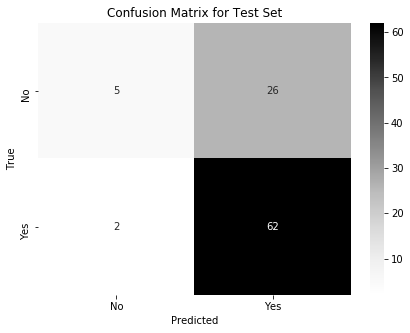

In [51]:
# Plotando a confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cm_test = confusion_matrix(y_test, clf.predict(X_test_norm))

plt.figure(figsize=(7,5))
sns.heatmap(cm_test, 
            annot=True, 
            cmap='Greys', 
            xticklabels=['No','Yes'], 
            yticklabels=['No','Yes'])
plt.title('Confusion Matrix for Test Set')
plt.ylabel('True')
plt.xlabel('Predicted')

Percebe-se pela *Confusion Matrix* que o modelo apresenta um Recall e uma Precisão satisfatórios, especialmente o Recall.
 - F1 Score de 0,8158 no conjunto de testes
 - Recall = 62/(62+2) = 96,88%
 - Precisão = 62/(62+26) = 70,45%
 
A confusion matrix mostra que o estimador está dando preferência à classificar a maioria dos alunos que não passaram como passaram. A correção de pos_label para `'no'` poderia melhorar este balanço, mas executando o trecho de código que inverte o rótulo de `'passed'` para `'not_passed'` resulta em soluções piores.

Um exercício futuro seria pergar os outros classificadores que não foram priorizados, como o LinearSVC, MLPClassifier, VotingClassifier, SGDClassifier, BaggingClassifier, XGBClassifier e GradientBoostingClassifier e realizar a calibração desses modelos para verificar se é obtido um classificador melhor que o encontrado para o SVC. Abaixo, uma exemplo para outro desses classificadores:

In [52]:
# TODO: Crie a lista de parâmetros que você gostaria de calibrar: nesse caso para o SVC
learning_rate_range = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.]
random_state_range = [0,10]
max_depth_range = [3,4,5,6,7,8,9,10]

parameters = dict(learning_rate=learning_rate_range, random_state=random_state_range, max_depth=max_depth_range)

# TODO: Inicialize o classificador
clf = XGBClassifier()

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer' 
f1_scorer = make_scorer(f1_score,
                        pos_label="yes")

# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação
grid_obj = GridSearchCV(clf, parameters, 
                        cv=4, # The default grid search uses 3 folds; use the 'cv' param to change this
                        scoring=f1_scorer, 
                        verbose=5)

# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj = grid_obj.fit(X_train, 
                        y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetros
y_pred = clf.predict(X_train)
f1_score_train = f1_score(y_train.values, 
                          y_pred, 
                          pos_label='yes')

print("O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(f1_score_train))

y_pred = clf.predict(X_test)
f1_score_test = f1_score(y_test.values, 
                         y_pred, 
                         pos_label='yes')

print("O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(f1_score_test))

Fitting 4 folds for each of 160 candidates, totalling 640 fits
[CV] learning_rate=0.1, max_depth=3, random_state=0 ..................
[CV]  learning_rate=0.1, max_depth=3, random_state=0, score=0.732143 -   0.0s
[CV] learning_rate=0.1, max_depth=3, random_state=0 ..................
[CV]  learning_rate=0.1, max_depth=3, random_state=0, score=0.781818 -   0.0s
[CV] learning_rate=0.1, max_depth=3, random_state=0 ..................
[CV]  learning_rate=0.1, max_depth=3, random_state=0, score=0.759259 -   0.0s
[CV] learning_rate=0.1, max_depth=3, random_state=0 ..................
[CV]  learning_rate=0.1, max_depth=3, random_state=0, score=0.841121 -   0.0s
[CV] learning_rate=0.1, max_depth=3, random_state=10 .................
[CV]  learning_rate=0.1, max_depth=3, random_state=10, score=0.732143 -   0.0s
[CV] learning_rate=0.1, max_depth=3, random_state=10 .................
[CV]  learning_rate=0.1, max_depth=3, random_state=10, score=0.781818 -   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, random_state=10 .................
[CV]  learning_rate=0.1, max_depth=3, random_state=10, score=0.759259 -   0.0s
[CV] learning_rate=0.1, max_depth=3, random_state=10 .................
[CV]  learning_rate=0.1, max_depth=3, random_state=10, score=0.841121 -   0.0s
[CV] learning_rate=0.1, max_depth=4, random_state=0 ..................
[CV]  learning_rate=0.1, max_depth=4, random_state=0, score=0.796460 -   0.0s
[CV] learning_rate=0.1, max_depth=4, random_state=0 ..................
[CV]  learning_rate=0.1, max_depth=4, random_state=0, score=0.800000 -   0.0s
[CV] learning_rate=0.1, max_depth=4, random_state=0 ..................
[CV]  learning_rate=0.1, max_depth=4, random_state=0, score=0.728972 -   0.0s
[CV] learning_rate=0.1, max_depth=4, random_state=0 ..................
[CV]  learning_rate=0.1, max_depth=4, random_state=0, score=0.830189 -   0.0s
[CV] learning_rate=0.1, max_depth=4, random_state=10 .................
[CV]  learning_rate=0.1, max_dept

[CV]  learning_rate=0.1, max_depth=10, random_state=10, score=0.830189 -   0.1s
[CV] learning_rate=0.2, max_depth=3, random_state=0 ..................
[CV]  learning_rate=0.2, max_depth=3, random_state=0, score=0.754386 -   0.0s
[CV] learning_rate=0.2, max_depth=3, random_state=0 ..................
[CV]  learning_rate=0.2, max_depth=3, random_state=0, score=0.770642 -   0.0s
[CV] learning_rate=0.2, max_depth=3, random_state=0 ..................
[CV]  learning_rate=0.2, max_depth=3, random_state=0, score=0.740741 -   0.0s
[CV] learning_rate=0.2, max_depth=3, random_state=0 ..................
[CV]  learning_rate=0.2, max_depth=3, random_state=0, score=0.780952 -   0.0s
[CV] learning_rate=0.2, max_depth=3, random_state=10 .................
[CV]  learning_rate=0.2, max_depth=3, random_state=10, score=0.754386 -   0.0s
[CV] learning_rate=0.2, max_depth=3, random_state=10 .................
[CV]  learning_rate=0.2, max_depth=3, random_state=10, score=0.770642 -   0.0s
[CV] learning_rate=0.2, 

[CV]  learning_rate=0.2, max_depth=9, random_state=10, score=0.766355 -   0.1s
[CV] learning_rate=0.2, max_depth=9, random_state=10 .................
[CV]  learning_rate=0.2, max_depth=9, random_state=10, score=0.811321 -   0.1s
[CV] learning_rate=0.2, max_depth=10, random_state=0 .................
[CV]  learning_rate=0.2, max_depth=10, random_state=0, score=0.750000 -   0.1s
[CV] learning_rate=0.2, max_depth=10, random_state=0 .................
[CV]  learning_rate=0.2, max_depth=10, random_state=0, score=0.747664 -   0.1s
[CV] learning_rate=0.2, max_depth=10, random_state=0 .................
[CV]  learning_rate=0.2, max_depth=10, random_state=0, score=0.763636 -   0.1s
[CV] learning_rate=0.2, max_depth=10, random_state=0 .................
[CV]  learning_rate=0.2, max_depth=10, random_state=0, score=0.807692 -   0.1s
[CV] learning_rate=0.2, max_depth=10, random_state=10 ................
[CV]  learning_rate=0.2, max_depth=10, random_state=10, score=0.750000 -   0.1s
[CV] learning_rate=0

[CV]  learning_rate=0.3, max_depth=8, random_state=10, score=0.774775 -   0.1s
[CV] learning_rate=0.3, max_depth=8, random_state=10 .................
[CV]  learning_rate=0.3, max_depth=8, random_state=10, score=0.811321 -   0.1s
[CV] learning_rate=0.3, max_depth=9, random_state=0 ..................
[CV]  learning_rate=0.3, max_depth=9, random_state=0, score=0.761062 -   0.1s
[CV] learning_rate=0.3, max_depth=9, random_state=0 ..................
[CV]  learning_rate=0.3, max_depth=9, random_state=0, score=0.742857 -   0.1s
[CV] learning_rate=0.3, max_depth=9, random_state=0 ..................
[CV]  learning_rate=0.3, max_depth=9, random_state=0, score=0.770642 -   0.1s
[CV] learning_rate=0.3, max_depth=9, random_state=0 ..................
[CV]  learning_rate=0.3, max_depth=9, random_state=0, score=0.811321 -   0.1s
[CV] learning_rate=0.3, max_depth=9, random_state=10 .................
[CV]  learning_rate=0.3, max_depth=9, random_state=10, score=0.761062 -   0.1s
[CV] learning_rate=0.3, m

[CV]  learning_rate=0.4, max_depth=7, random_state=10, score=0.759259 -   0.0s
[CV] learning_rate=0.4, max_depth=7, random_state=10 .................
[CV]  learning_rate=0.4, max_depth=7, random_state=10, score=0.838095 -   0.1s
[CV] learning_rate=0.4, max_depth=8, random_state=0 ..................
[CV]  learning_rate=0.4, max_depth=8, random_state=0, score=0.733945 -   0.1s
[CV] learning_rate=0.4, max_depth=8, random_state=0 ..................
[CV]  learning_rate=0.4, max_depth=8, random_state=0, score=0.730769 -   0.1s
[CV] learning_rate=0.4, max_depth=8, random_state=0 ..................
[CV]  learning_rate=0.4, max_depth=8, random_state=0, score=0.747664 -   0.1s
[CV] learning_rate=0.4, max_depth=8, random_state=0 ..................
[CV]  learning_rate=0.4, max_depth=8, random_state=0, score=0.833333 -   0.0s
[CV] learning_rate=0.4, max_depth=8, random_state=10 .................
[CV]  learning_rate=0.4, max_depth=8, random_state=10, score=0.733945 -   0.1s
[CV] learning_rate=0.4, m

[CV]  learning_rate=0.5, max_depth=6, random_state=10, score=0.770642 -   0.1s
[CV] learning_rate=0.5, max_depth=6, random_state=10 .................
[CV]  learning_rate=0.5, max_depth=6, random_state=10, score=0.792453 -   0.0s
[CV] learning_rate=0.5, max_depth=7, random_state=0 ..................
[CV]  learning_rate=0.5, max_depth=7, random_state=0, score=0.810811 -   0.1s
[CV] learning_rate=0.5, max_depth=7, random_state=0 ..................
[CV]  learning_rate=0.5, max_depth=7, random_state=0, score=0.737864 -   0.1s
[CV] learning_rate=0.5, max_depth=7, random_state=0 ..................
[CV]  learning_rate=0.5, max_depth=7, random_state=0, score=0.747664 -   0.1s
[CV] learning_rate=0.5, max_depth=7, random_state=0 ..................
[CV]  learning_rate=0.5, max_depth=7, random_state=0, score=0.833333 -   0.2s
[CV] learning_rate=0.5, max_depth=7, random_state=10 .................
[CV]  learning_rate=0.5, max_depth=7, random_state=10, score=0.810811 -   0.2s
[CV] learning_rate=0.5, m

[CV]  learning_rate=0.6, max_depth=6, random_state=0, score=0.732143 -   0.0s
[CV] learning_rate=0.6, max_depth=6, random_state=0 ..................
[CV]  learning_rate=0.6, max_depth=6, random_state=0, score=0.725490 -   0.1s
[CV] learning_rate=0.6, max_depth=6, random_state=0 ..................
[CV]  learning_rate=0.6, max_depth=6, random_state=0, score=0.747664 -   0.0s
[CV] learning_rate=0.6, max_depth=6, random_state=0 ..................
[CV]  learning_rate=0.6, max_depth=6, random_state=0, score=0.826923 -   0.0s
[CV] learning_rate=0.6, max_depth=6, random_state=10 .................
[CV]  learning_rate=0.6, max_depth=6, random_state=10, score=0.732143 -   0.0s
[CV] learning_rate=0.6, max_depth=6, random_state=10 .................
[CV]  learning_rate=0.6, max_depth=6, random_state=10, score=0.725490 -   0.0s
[CV] learning_rate=0.6, max_depth=6, random_state=10 .................
[CV]  learning_rate=0.6, max_depth=6, random_state=10, score=0.747664 -   0.0s
[CV] learning_rate=0.6, m

[CV]  learning_rate=0.7, max_depth=5, random_state=0, score=0.754386 -   0.1s
[CV] learning_rate=0.7, max_depth=5, random_state=0 ..................
[CV]  learning_rate=0.7, max_depth=5, random_state=0, score=0.761905 -   0.1s
[CV] learning_rate=0.7, max_depth=5, random_state=0 ..................
[CV]  learning_rate=0.7, max_depth=5, random_state=0, score=0.781818 -   0.1s
[CV] learning_rate=0.7, max_depth=5, random_state=0 ..................
[CV]  learning_rate=0.7, max_depth=5, random_state=0, score=0.823529 -   0.1s
[CV] learning_rate=0.7, max_depth=5, random_state=10 .................
[CV]  learning_rate=0.7, max_depth=5, random_state=10, score=0.754386 -   0.1s
[CV] learning_rate=0.7, max_depth=5, random_state=10 .................
[CV]  learning_rate=0.7, max_depth=5, random_state=10, score=0.761905 -   0.1s
[CV] learning_rate=0.7, max_depth=5, random_state=10 .................
[CV]  learning_rate=0.7, max_depth=5, random_state=10, score=0.781818 -   0.1s
[CV] learning_rate=0.7, m

[CV] learning_rate=0.8, max_depth=4, random_state=0 ..................
[CV]  learning_rate=0.8, max_depth=4, random_state=0, score=0.876190 -   0.1s
[CV] learning_rate=0.8, max_depth=4, random_state=10 .................
[CV]  learning_rate=0.8, max_depth=4, random_state=10, score=0.733945 -   0.0s
[CV] learning_rate=0.8, max_depth=4, random_state=10 .................
[CV]  learning_rate=0.8, max_depth=4, random_state=10, score=0.720000 -   0.0s
[CV] learning_rate=0.8, max_depth=4, random_state=10 .................
[CV]  learning_rate=0.8, max_depth=4, random_state=10, score=0.750000 -   0.0s
[CV] learning_rate=0.8, max_depth=4, random_state=10 .................
[CV]  learning_rate=0.8, max_depth=4, random_state=10, score=0.876190 -   0.0s
[CV] learning_rate=0.8, max_depth=5, random_state=0 ..................
[CV]  learning_rate=0.8, max_depth=5, random_state=0, score=0.763636 -   0.0s
[CV] learning_rate=0.8, max_depth=5, random_state=0 ..................
[CV]  learning_rate=0.8, max_de

[CV]  learning_rate=0.9, max_depth=3, random_state=0, score=0.735849 -   0.0s
[CV] learning_rate=0.9, max_depth=3, random_state=0 ..................
[CV]  learning_rate=0.9, max_depth=3, random_state=0, score=0.849057 -   0.0s
[CV] learning_rate=0.9, max_depth=3, random_state=10 .................
[CV]  learning_rate=0.9, max_depth=3, random_state=10, score=0.743363 -   0.0s
[CV] learning_rate=0.9, max_depth=3, random_state=10 .................
[CV]  learning_rate=0.9, max_depth=3, random_state=10, score=0.752475 -   0.0s
[CV] learning_rate=0.9, max_depth=3, random_state=10 .................
[CV]  learning_rate=0.9, max_depth=3, random_state=10, score=0.735849 -   0.0s
[CV] learning_rate=0.9, max_depth=3, random_state=10 .................
[CV]  learning_rate=0.9, max_depth=3, random_state=10, score=0.849057 -   0.0s
[CV] learning_rate=0.9, max_depth=4, random_state=0 ..................
[CV]  learning_rate=0.9, max_depth=4, random_state=0, score=0.732143 -   0.0s
[CV] learning_rate=0.9, 

[CV]  learning_rate=0.9, max_depth=10, random_state=0, score=0.705882 -   0.0s
[CV] learning_rate=0.9, max_depth=10, random_state=0 .................
[CV]  learning_rate=0.9, max_depth=10, random_state=0, score=0.792453 -   0.1s
[CV] learning_rate=0.9, max_depth=10, random_state=10 ................
[CV]  learning_rate=0.9, max_depth=10, random_state=10, score=0.722222 -   0.0s
[CV] learning_rate=0.9, max_depth=10, random_state=10 ................
[CV]  learning_rate=0.9, max_depth=10, random_state=10, score=0.750000 -   0.1s
[CV] learning_rate=0.9, max_depth=10, random_state=10 ................
[CV]  learning_rate=0.9, max_depth=10, random_state=10, score=0.705882 -   0.0s
[CV] learning_rate=0.9, max_depth=10, random_state=10 ................
[CV]  learning_rate=0.9, max_depth=10, random_state=10, score=0.792453 -   0.1s
[CV] learning_rate=1.0, max_depth=3, random_state=0 ..................
[CV]  learning_rate=1.0, max_depth=3, random_state=0, score=0.728972 -   0.0s
[CV] learning_rate

[CV] learning_rate=1.0, max_depth=9, random_state=10 .................
[CV]  learning_rate=1.0, max_depth=9, random_state=10, score=0.736842 -   0.1s
[CV] learning_rate=1.0, max_depth=9, random_state=10 .................
[CV]  learning_rate=1.0, max_depth=9, random_state=10, score=0.725490 -   0.1s
[CV] learning_rate=1.0, max_depth=9, random_state=10 .................
[CV]  learning_rate=1.0, max_depth=9, random_state=10, score=0.742857 -   0.0s
[CV] learning_rate=1.0, max_depth=9, random_state=10 .................
[CV]  learning_rate=1.0, max_depth=9, random_state=10, score=0.810811 -   0.1s
[CV] learning_rate=1.0, max_depth=10, random_state=0 .................
[CV]  learning_rate=1.0, max_depth=10, random_state=0, score=0.736842 -   0.0s
[CV] learning_rate=1.0, max_depth=10, random_state=0 .................
[CV]  learning_rate=1.0, max_depth=10, random_state=0, score=0.693069 -   0.1s
[CV] learning_rate=1.0, max_depth=10, random_state=0 .................
[CV]  learning_rate=1.0, max_

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:   34.1s finished


In [53]:
# Imprime o melhor estimador
print(clf)

# look at results
print("\nClassification Report\n")
print(metrics.classification_report(y_test, clf.predict(X_test)))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Classification Report

             precision    recall  f1-score   support

         no       0.42      0.35      0.39        31
        yes       0.71      0.77      0.74        64

avg / total       0.62      0.63      0.62        95



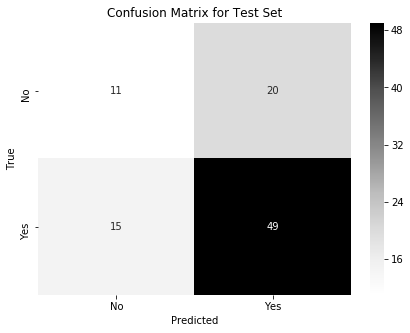

In [54]:
cm_test = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(7,5))
sns.heatmap(cm_test, 
            annot=True, 
            cmap='Greys', 
            xticklabels=['No','Yes'], 
            yticklabels=['No','Yes'])
plt.title('Confusion Matrix for Test Set')
plt.ylabel('True')
plt.xlabel('Predicted')

Usando a *K-folds Cross Validation* (com 4 folds `'cv=4'`) com o conjunto de treino ele apresentou a melhor performance.

[CV]  learning_rate=0.1, max_depth=6, random_state=0, score=0.796460 -   0.1s

[CV]  learning_rate=0.1, max_depth=6, random_state=0 ..................

[CV]  learning_rate=0.1, max_depth=6, random_state=0, score=0.800000 -   0.1s

[CV]  learning_rate=0.1, max_depth=6, random_state=0 ..................

[CV]  learning_rate=0.1, max_depth=6, random_state=0, score=0.742857 -   0.1s

[CV]  learning_rate=0.1, max_depth=6, random_state=0 ..................

[CV]  learning_rate=0.1, max_depth=6, random_state=0, score=0.841121 -   0.1s

Mas o *F1 Score* ainda ficou abaixo do SVC, mas o F1 score para `'no'` ficou melhor, e é oque é interessante para o problema, acertar mais `'no'` do que `'yes'`, e a média entre eles ficou parecida.

### Questão 5 - Pontuação F<sub>1</sub> Final
*Qual é a pontuação F<sub>1</sub> do modelo final para treinamento e teste? Como ele se compara ao modelo que não foi calibrado?*

**Resposta: **A Pontuação F1 do treinamento do modelo calibrado foi 0.8228, 6,2% menor que o não calibrado para o mesmo tamanho de conjunto de treinamento, que foi de 0.8772. No entanto, a Pontuação F1 do teste aumentou, passando de 0.8026 para 0.8158 para o mesmo tamanho de conjunto de testes (aumento de 1,6%). É possível perceber, então que reduziu-se o overfitting e aumentou-se a generalização, com o uso do modelo calibrado.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando o iPython Nothebook como um document HTML. Você pode fazer isso utilizando o menu acima e navegando para  
**File -> Download as -> HTML (.html)**. Inclua a documentação final junto com o notebook para o envio do seu projeto.